In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
set(stopwords.words('english'))

import preprocess


In [2]:
data_dir = "TweetQA_data/"
with open(data_dir + "/train.json", 'r') as f:
    train_data = json.load(f)
with open(data_dir + "/dev.json", 'r') as f:
    dev_data = json.load(f)    
with open(data_dir + "/test.json", 'r') as f:
    test_data = json.load(f)        

In [3]:
class data_set:
    def __init__ (self, data, test = False):
        self.test = test
        self.Questions = [item['Question'] for item in data]      
        self.Tweets = [item['Tweet'] for item in data]
        if (not test):
            self.Answers = [item['Answer'] for item in data]
        
    def clean_data(self, filename):
        self.clean_questions = [preprocess.preprocess(q) for q in self.Questions]
        self.clean_tweets = [preprocess.preprocess(t) for t in self.Tweets]
        # no need to clean the answers
        if not self.test: 
            self.clean_answers = self.Answers
            self.cleaned_data_set = list(zip(self.clean_tweets, self.clean_questions, self.clean_answers ))
        else:
            self.cleaned_data_set = list(zip(self.clean_tweets, self.clean_questions))
        pd.DataFrame(self.cleaned_data_set).to_csv(data_dir + 'clean_data/' + filename + '.txt', index=False, header= None, sep  = '\t' )

        

In [14]:
def wordcloud(text,stopwords,ngram=1):
    wordcloud = WordCloud(width=1400, 
                          height=800,
                          background_color='black',
                          stopwords=stop)
    if ngram ==1:
       wordc = wordcloud.generate(' '.join(text))
    else:
       wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)

In [5]:
def remove_months(sentences):
    no_months = []
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
    for sentence in sentences:
        for word in sentence.split():
            if word not in months:
                no_months.append(word)
                
    return no_months         

In [6]:
train_set = data_set(train_data)
dev_set = data_set(dev_data)
test_set = data_set(test_data,True)

# Data Statistics

### Data set size

([<matplotlib.axis.XTick at 0x268b92770c8>,
 <a list of 3 Text xticklabel objects>)

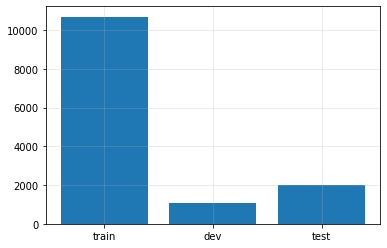

In [7]:
plt.grid(alpha = 0.3)
plt.bar(np.arange(3),[len(train_data), len(dev_data),len(test_data)])
plt.xticks(np.arange(3), ['train','dev','test'])


### Dominant words in tweets

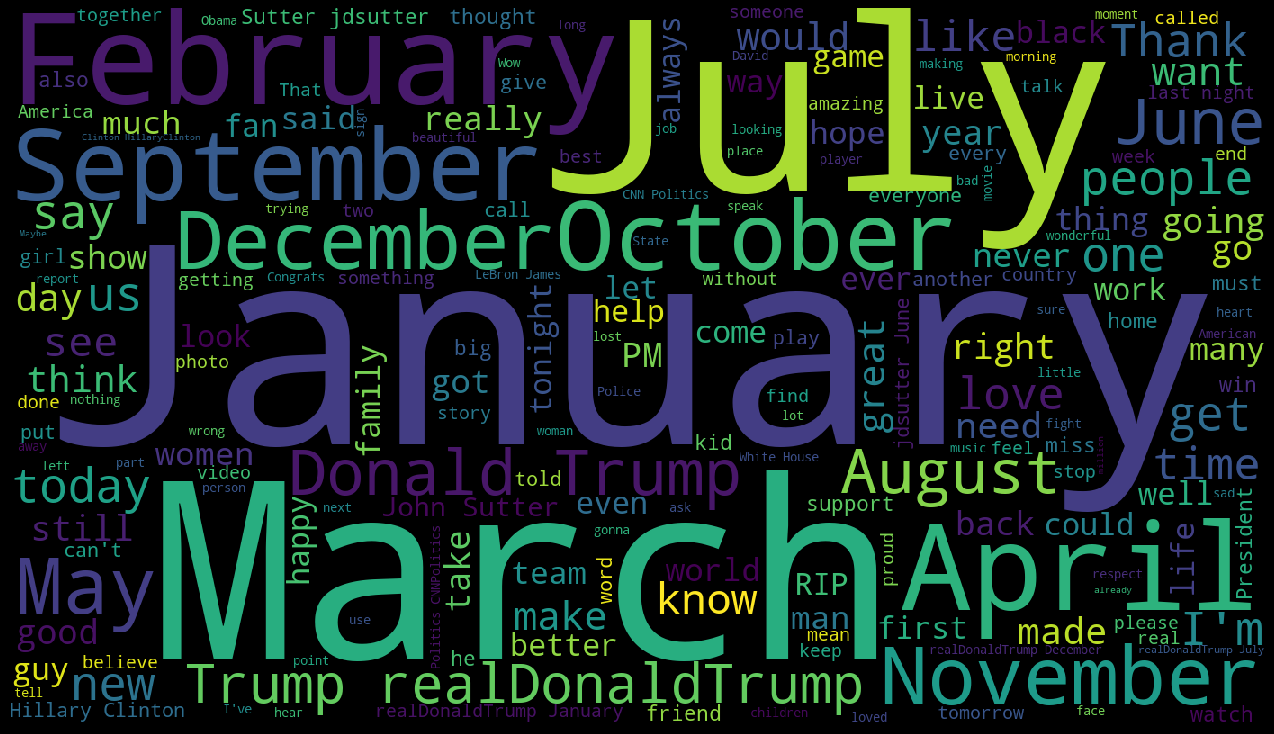

In [8]:
stop = stopwords.words('english')

wordcloud(train_set.Tweets,stop)

Months are dominating, remove months to see other high frequency words

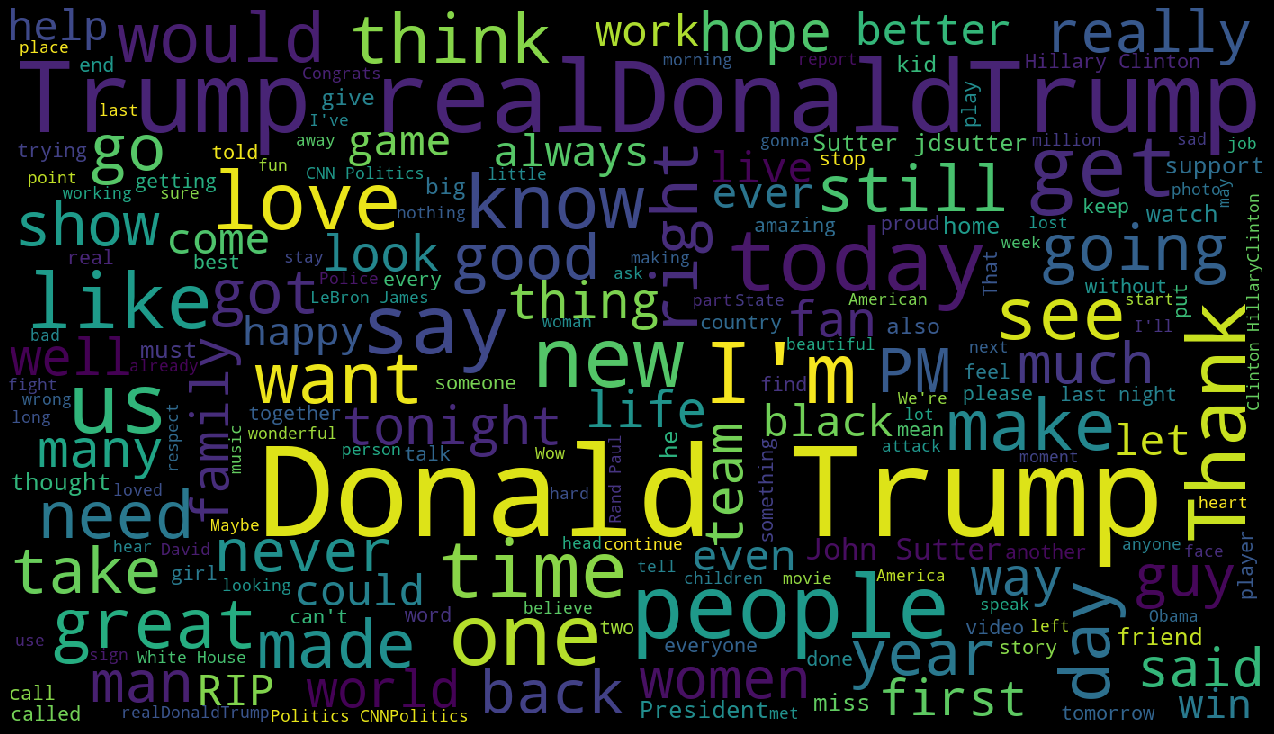

In [9]:
wordcloud(remove_months(train_set.Tweets),stop)

### Average lengths

In [10]:
Tweet_lens = [len(tweet.split()) for tweet in train_set.Tweets]
Question_lens = [len(tweet.split()) for tweet in train_set.Questions]
Answer_lens = [len(tweet[0].split()) for tweet in train_set.Answers]

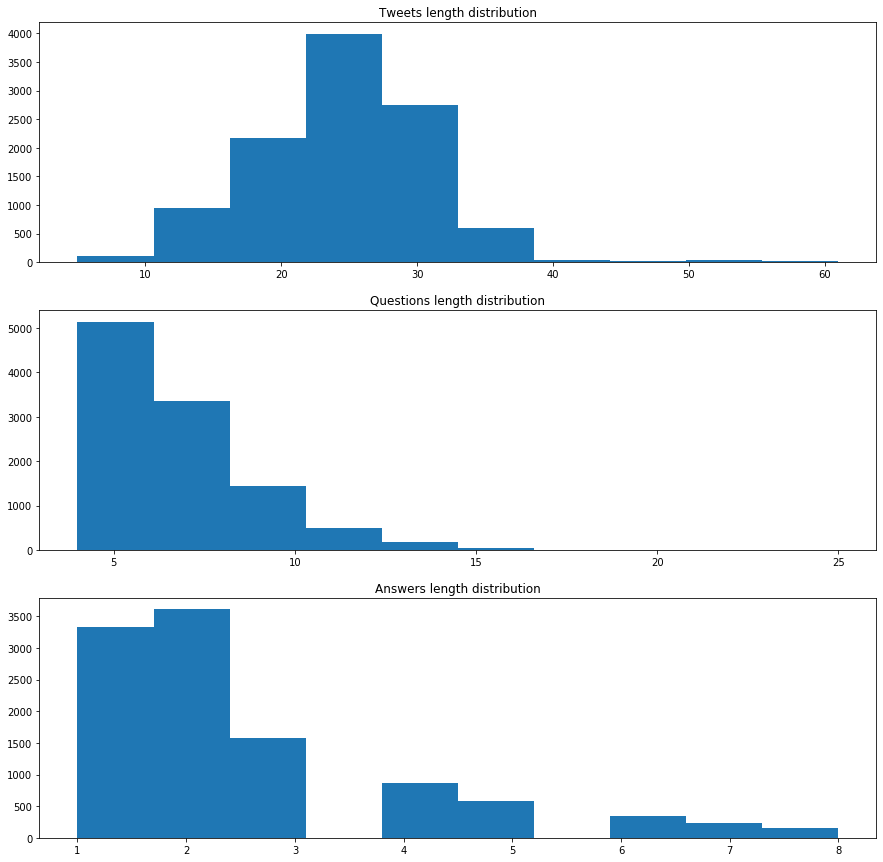

In [11]:

fig, axs = plt.subplots(3)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0].hist(Tweet_lens)
axs[0].title.set_text('Tweets length distribution')
axs[1].hist(Question_lens)
axs[1].title.set_text('Questions length distribution')
axs[2].hist(Answer_lens)
axs[2].title.set_text('Answers length distribution')


### Length Statistics

In [12]:
index = ['Tweet_lens', 'Question_lens', 'Answer_lens']
columns = ['Median', 'Mean', 'Maximum', 'Minimum', '_95th_perc']
df = pd.DataFrame(index=index, columns=columns)

for index, _ in df.iterrows():
    df.loc[index].Median = np.median(eval(index))
    df.loc[index].Mean = np.mean(eval(index))
    df.loc[index].Maximum = np.max(eval(index))
    df.loc[index].Minimum = np.min(eval(index))
    df.loc[index]._95th_perc = np.percentile(eval(index),95)
    
df    

,Median,Mean,Maximum,Minimum,_95th_perc
Tweet_lens,25,24.5201,61,5,33
Question_lens,7,6.99832,25,4,11
Answer_lens,2,2.4827,8,1,6


# Clean Data 
### Operations  performed / not performed :
1. Lower cased
2. Remove everything after timestamp.
3. Remove punctuation.
4. Remove user name (that's other than @mention name)


5. Didnt remove dates because some questions ask for it
6. Dont remove @mentions because some questions ask for it


In [13]:

train_set.clean_data('train')
dev_set.clean_data('dev')
test_set.clean_data('test')
# saved in the folder clean data as .txt files